In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [105]:
from scipy import stats

In [3]:
import env 
import acquire
import prepare
import model
import split_scale

# ACQUIRE

In [16]:
raw_df = acquire.get_telco_chunk()

In [17]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null object
payment_type_id             7043 non-null int64
monthly_charges 

In [18]:
raw_df = raw_df.set_index('customer_id')

In [58]:
raw_df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,price_groups
customer_id,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,"(58.45, 68.5]"
0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,...,No,No,Yes,1,No,2,59.9,542.4,No,"(58.45, 68.5]"
0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,"(68.5, 78.55]"
0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,"(88.6, 98.65]"
0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,"(78.55, 88.6]"


In [61]:
raw_df['price_groups'] = pd.cut(raw_df['monthly_charges'], 12)

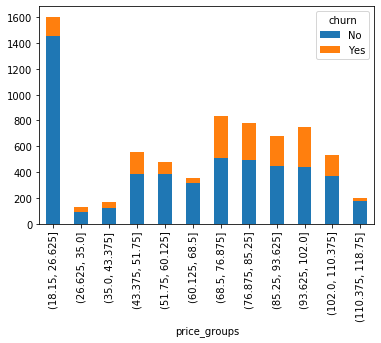

In [62]:
raw_df.groupby(["price_groups", "churn"]).size().unstack().plot(kind='bar', stacked=True) 

### It's acquired, now
# PREPARE

In [4]:
df = prepare.prep_telco()

In [32]:
# # Use a label encoder to transform the embarked column.
def encode_variable(column, df):
    lab_enc = LabelEncoder()
    lab_enc.fit(df[column])
    df[column] = lab_enc.transform(df[column])

In [ ]:
## I wanted to do this inside the prepare module, but it was not cooperating.

In [33]:
cat_cols = df.select_dtypes('object').columns
for i in cat_cols:
    encode_variable(i, df)

7043 customer records. Ready for exporation

In [ ]:
df.head()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
gender                      7043 non-null int64
senior_citizen              7043 non-null int64
partner                     7043 non-null int64
dependents                  7043 non-null int64
tenure                      7043 non-null int64
phone_service               7043 non-null int64
multiple_lines              7043 non-null int64
internet_service_type_id    7043 non-null int64
online_security             7043 non-null int64
online_backup               7043 non-null int64
device_protection           7043 non-null int64
tech_support                7043 non-null int64
streaming_tv                7043 non-null int64
streaming_movies            7043 non-null int64
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null int64
payment_type_id             7043 non-null int64
monthly_charges             7043 non-null float64
total_charges    

## TEST/SPLIT X/y

In [9]:
X = df.drop('churn',axis=1)
#X = df[['monthly_charges']]

In [35]:
y = df['churn']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [37]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges
customer_id,,,,,,,,,,,,,,,,,,,
2187-PKZAY,1,0,0,0,12,1,0,2,0,0,0,0,0,2,1,1,3,79.95,1043.40
3402-XRIUO,0,1,1,0,22,1,2,1,2,2,0,2,0,0,1,1,2,63.55,1381.80
9397-TZSHA,0,0,0,0,69,1,2,3,1,1,1,1,1,1,3,0,4,24.60,1678.05
9153-BTBVV,0,0,1,0,71,1,2,3,1,1,1,1,1,1,3,0,3,25.00,1753.00
3793-MMFUH,0,1,0,0,13,1,2,2,0,0,0,0,2,2,1,1,1,95.05,1290.00


### PREP is boring, Let's 
# MODEL AND CHART STUFF. 
# OR EXPLORE. 
I guess.

In [108]:
stats.pearsonr(df.monthly_charges, df.phone_service)

(0.2473979632141361, 1.0421589009001358e-98)

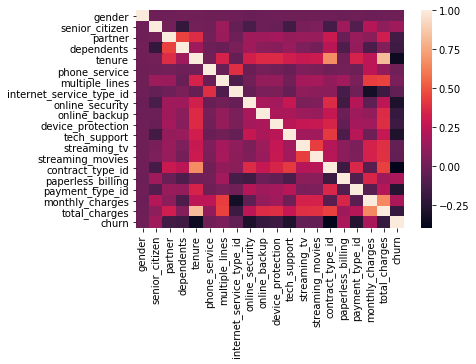

In [63]:
corr = df.corr()
# Generating a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

Text(0.5, 1.0, 'TOTAL CHURN RATE')

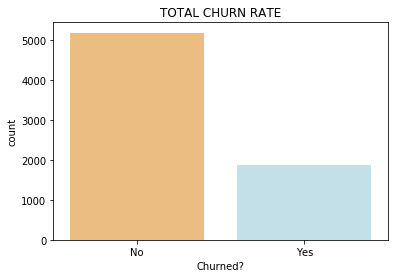

In [92]:
ax = sns.countplot(x='churn', data=raw_df, palette="RdYlBu")
plt.xlabel("Churned?")
plt.title("TOTAL CHURN RATE")

In [14]:
y_True = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["churn"].shape[0]) * 100 ))

Churn Percentage = 26.536987079369588


In [ ]:
sns.countplot(x='churn', data=df, hue='contract_type_id')

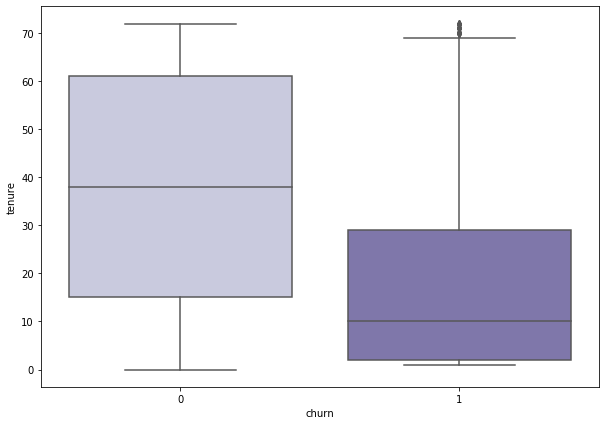

In [42]:
#Boxplot to show the distribution of ages. X is class, Y is age.
plt.figure(figsize = (10,7))
sns.boxplot(x='churn', y='tenure', data=df, palette="Purples")

In [ ]:
#figsize=(30,10)

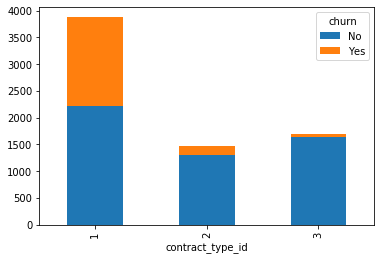

In [103]:
raw_df.groupby(["contract_type_id", "churn"]).size().unstack().plot(kind='bar', stacked=True) 

In [106]:
df.online_security.head()

customer_id
0002-ORFBO    0
0003-MKNFE    0
0004-TLHLJ    0
0011-IGKFF    0
0013-EXCHZ    0
Name: online_security, dtype: int64

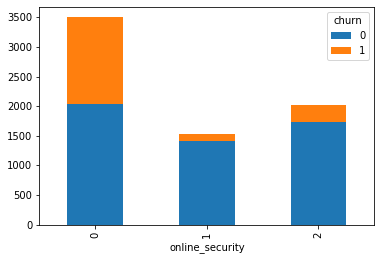

In [104]:
df.groupby(["online_security", "churn"]).size().unstack().plot(kind='bar', stacked=True) 

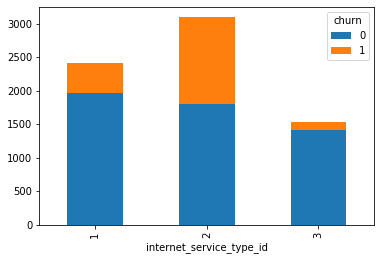

In [98]:
df.groupby(["internet_service_type_id", "churn"]).size().unstack().plot(kind='bar', stacked=True) 

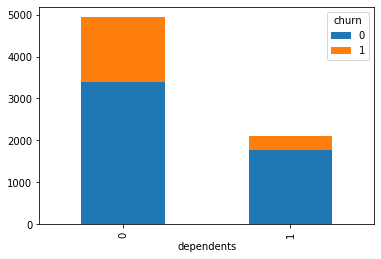

In [100]:
df.groupby(["dependents", "churn"]).size().unstack().plot(kind='bar', stacked=True) 

# MODEL, Decision-Tree

In [38]:
model.do_the_decisionTree('gini', X_train, y_train)

0.7835699797160244

In [39]:
model.do_the_decisionTree('entropy', X_train, y_train)

0.7835699797160244

In [ ]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

# MODEL, log-reg

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
predictions = logmodel.predict(X_train)
predictions_probas = logmodel.predict_proba(X_train)

In [ ]:
predictions_probas[:,0] < .5

In [ ]:
from sklearn import metrics

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_train, predictions)

In [ ]:
cnf_matrix

In [ ]:
logreg_report = metrics.classification_report(y_train, predictions, output_dict=True)

In [ ]:
logreg_report['0']

In [ ]:
logreg_report['1']

# MONTH2MONTH vs 1-Year

In [ ]:
def get_month2month():
    query = '''
    SELECT 
    *
    FROM 
    customers
    WHERE contract_type_id = 1
    AND tenure = 12
    ;
    '''
    df = pd.read_sql(query, get_db_url('telco_churn'))
    return df

In [ ]:
def get_db_url(db):
    return f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'

In [ ]:
m2m = get_month2month()

In [ ]:
m2m